In [1]:
import os
base_dir = 'dataset_split'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_cercospora_dir = os.path.join(train_dir, 'cercospora')
train_commonrust_dir = os.path.join(train_dir, 'commonrust')
train_normal_dir = os.path.join(train_dir, 'normal')
train_northernleaf_dir = os.path.join(train_dir, 'northernleaf')

validation_cercospora_dir = os.path.join(validation_dir, 'cercospora')
validation_commonrust_dir = os.path.join(validation_dir, 'commonrust')
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_northernleaf_dir = os.path.join(validation_dir, 'northernleaf')

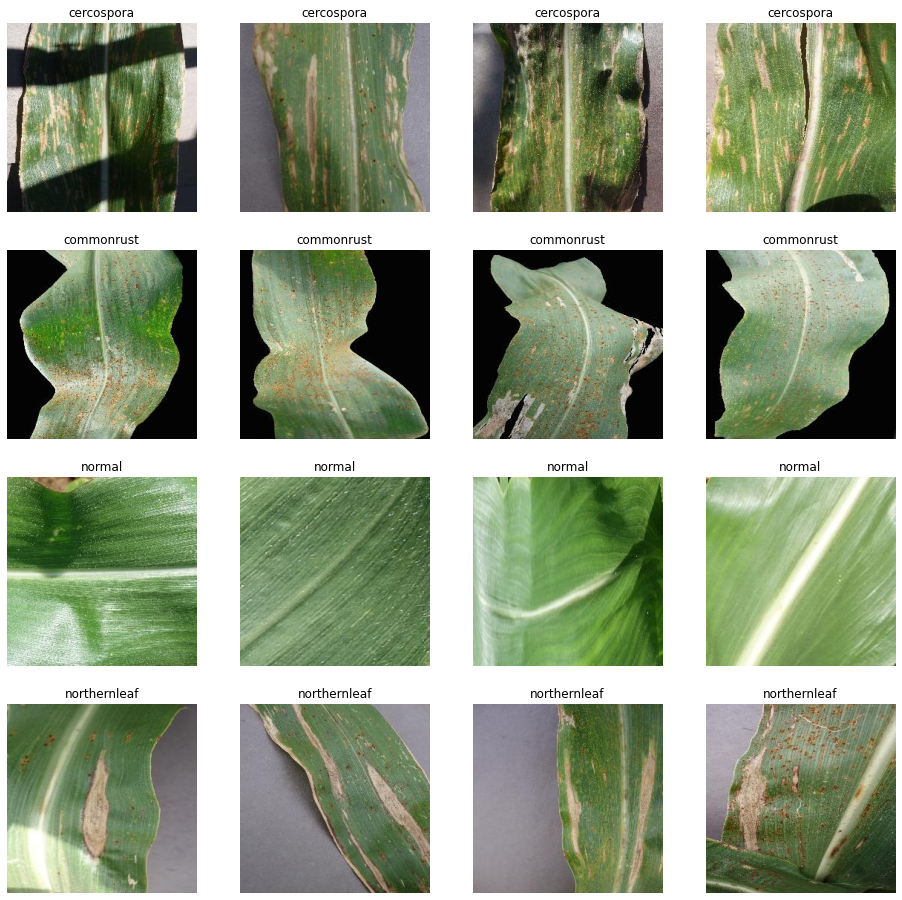

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
cercospora_img = [os.path.join(train_cercospora_dir, fname) 
                for fname in os.listdir(train_cercospora_dir)[pic_index-4:pic_index]]
commonrust_img  = [os.path.join(train_commonrust_dir, fname) 
                for fname in os.listdir(train_commonrust_dir)[pic_index-4:pic_index]]
normal_img = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
northernleaf_img  = [os.path.join(train_northernleaf_dir, fname) 
                for fname in os.listdir(train_northernleaf_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(cercospora_img+commonrust_img+normal_img+northernleaf_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

In [4]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [5]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [6]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (1600, 150, 150, 3)
Train Label =  (1600,)
Validation Data =  (380, 150, 150, 3)
Validation Label =  (380,)


In [7]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [120 127 144]
Data setelah di-normalisasi  [0.47058824 0.49803922 0.5647059 ]


In [8]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label)

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_val)

Label sebelum di-encoder  ['cercospora' 'cercospora' 'cercospora' ... 'northernleaf' 'northernleaf'
 'northernleaf']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3]


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten , GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image 
import cv2

In [10]:
model = Sequential()
model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPooling2D())
model.add(Flatten())

In [11]:
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 38, 38, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

In [13]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [14]:
H = model.fit(x_train, y_train, batch_size=50, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
32/32 [==============================] - 12s 100ms/step - loss: 1.2501 - accuracy: 0.4706 - val_loss: 0.9731 - val_accuracy: 0.5711
Epoch 2/100
32/32 [==============================] - 1s 39ms/step - loss: 0.8199 - accuracy: 0.6131 - val_loss: 0.7277 - val_accuracy: 0.5974
Epoch 3/100
32/32 [==============================] - 1s 39ms/step - loss: 0.5954 - accuracy: 0.7250 - val_loss: 0.4596 - val_accuracy: 0.7632
Epoch 4/100
32/32 [==============================] - 1s 40ms/step - loss: 0.4248 - accuracy: 0.7931 - val_loss: 0.4452 - val_accuracy: 0.7316
Epoch 5/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3950 - accuracy: 0.7950 - val_loss: 0.3895 - val_accuracy: 0.7947
Epoch 6/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3666 - accuracy: 0.8188 - val_loss: 0.3507 - val_accuracy: 0.8211
Epoch 7/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3457 - accuracy: 0.8213 - val_loss: 0.3457 - val_accuracy: 0.8026
Epoc

32/32 [==============================] - 1s 41ms/step - loss: 0.0586 - accuracy: 0.9800 - val_loss: 0.2517 - val_accuracy: 0.9026
Epoch 59/100
32/32 [==============================] - 1s 41ms/step - loss: 0.0612 - accuracy: 0.9781 - val_loss: 0.2904 - val_accuracy: 0.9000
Epoch 60/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0490 - accuracy: 0.9837 - val_loss: 0.2506 - val_accuracy: 0.9105
Epoch 61/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0781 - accuracy: 0.9700 - val_loss: 0.3321 - val_accuracy: 0.8868
Epoch 62/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0753 - accuracy: 0.9706 - val_loss: 0.2777 - val_accuracy: 0.8895
Epoch 63/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0518 - accuracy: 0.9800 - val_loss: 0.2831 - val_accuracy: 0.9026
Epoch 64/100
32/32 [==============================] - 1s 40ms/step - loss: 0.0506 - accuracy: 0.9812 - val_loss: 0.2689 - val_accuracy: 0.8947
Epoch 65/100

In [15]:
from keras.models import model_from_json
import json

target_dir = 'model'

# simpan history model kedua
history_dict = H.history
json.dump(history_dict, open(target_dir + '/history2.json', 'w'))

# simpan model kedua dan weight-nya
model.save(target_dir + '/model2.h5')
model.save_weights(target_dir + '/model_weights2.h5')